<a href="https://colab.research.google.com/github/yeijSong/dataAnalysis/blob/main/unit14_numpy%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EB%82%98%EB%A7%8C%EC%9D%98_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


**데이터를 살펴보는 방법**

1) 엑셀 같은 스프레드시트 프로그램 등을 활용해 데이터 자세히 살펴보기<br>
2) 데이터가 담고 있는 내용(또는 담고 있지 않은 내용)<br>
3) 데이터가 기록된 기간은 언제부터 언제까지 인지<br>
4) 어떤 형태로 시각화해보면 어떤 정보들을 알 수 있을지 생각해보기<br>
5) 데이터를 보며 궁금한 내용들 자유롭게 질문하기

### **문제 정의**<br>
**전국에서 신도림동의 연령별 인구 구조와 가장 형태가 비슷한 지역은?**

<알고리즘 설계> <br>
1. 데이터를 읽어온다.
2. 궁금한 지역의 이름을 입력 받는다.
3. 궁금한 지역의 인구 구조를 저장한다.
4. 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역을 찾는다.
5. 가장 비슷한 곳의 인구 구조와 궁금한 지역의 인구 구조를 시각화 한다.

1. 데이터를 읽어온다

In [ ]:
import csv
f= open('age.csv',encoding='cp949')
data=csv.reader(f)

next(data)

for row in data:
  print(row)

2. 궁금한 지역의 이름을 입력 받는다.

In [ ]:
import csv

f= open('age.csv',encoding='cp949')
data=csv.reader(f)
next(data)

home = [] # 입력받은 지역의 데이터를 저장할 리스트

name=input('인구구조가 궁금한 지역명(읍면동 단위)을 입력하세요 : ')

for row in data:
  if name in row[0]:
    for i in row[3:]:
      home.append(int(i.replace(',','')))

print(home)

인구구조가 궁금한 지역명(읍면동 단위)을 입력하세요 : 신도림
[326, 334, 406, 413, 389, 408, 417, 434, 411, 387, 420, 383, 354, 357, 340, 338, 349, 339, 407, 380, 390, 453, 424, 516, 451, 466, 448, 484, 471, 476, 558, 541, 579, 619, 638, 740, 756, 792, 745, 789, 671, 687, 700, 636, 726, 691, 657, 619, 649, 585, 579, 470, 522, 534, 563, 445, 511, 569, 572, 513, 532, 456, 426, 497, 379, 384, 399, 279, 289, 276, 268, 271, 223, 170, 150, 154, 177, 140, 126, 114, 121, 97, 86, 80, 59, 48, 44, 43, 28, 29, 22, 15, 13, 12, 5, 8, 5, 4, 2, 3, 7]


3. 궁금한 지역의 인구구조를 저장한다.

In [ ]:
import csv
import numpy as np

f= open('age.csv',encoding='cp949')
data=csv.reader(f)
next(data)

name=input('인구구조가 궁금한 지역명(읍면동 단위)을 입력하세요 : ')

for row in data:
  if name in row[0]:
    home = np.array(row[3:], dtype=int) # numpy배열로 저장할 때 데이터 타입 int로 변환

print(home)

인구구조가 궁금한 지역명(읍면동 단위)을 입력하세요 : 신도림
[326 334 406 413 389 408 417 434 411 387 420 383 354 357 340 338 349 339
 407 380 390 453 424 516 451 466 448 484 471 476 558 541 579 619 638 740
 756 792 745 789 671 687 700 636 726 691 657 619 649 585 579 470 522 534
 563 445 511 569 572 513 532 456 426 497 379 384 399 279 289 276 268 271
 223 170 150 154 177 140 126 114 121  97  86  80  59  48  44  43  28  29
  22  15  13  12   5   8   5   4   2   3   7]


인구구조가 궁금한 지역명(읍면동 단위)을 입력하세요 : 신도림


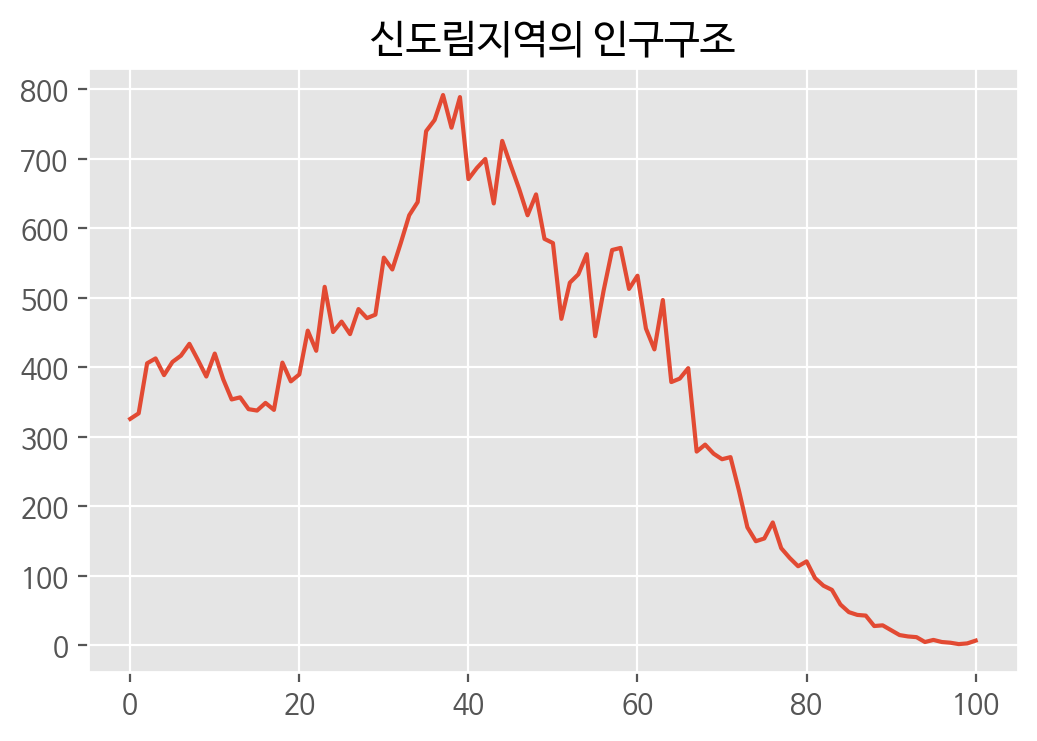

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f= open('age.csv',encoding='cp949')
data=csv.reader(f)
next(data)

name=input('인구구조가 궁금한 지역명(읍면동 단위)을 입력하세요 : ')

for row in data:
  if name in row[0]:
    home = np.array(row[3:], dtype=int)

plt.style.use('ggplot')
plt.figure(dpi=200)
plt.rc('font',family='NanumBarunGothic')
plt.title(name+'지역의 인구구조')
plt.plot(home)
plt.show()

4. 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역을 찾는다.


*   전국의 모든 지역 중 한곳 (B)을 선택 한다.
*   궁금한 지역 A의 0세 인구수에서 B의 0세 인구수를 뺀다
*   100세 이상 인구수에 해당 하는 값까지 반복한 후 각각의 차이를 모두 더한다.
*   전국의 모든 지역에 대해 반복하며, 그 차이가 가장 작은 지역을 찾는다.


**궁금한 지역 A의 0세 인구비율에서 B의 0세 인구비율을 뺀다**<br>
인구의 규모가 다른 지역을 비교하다 보면 오류가 발생할 수 있기 때문에 비율로 비교

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f= open('age.csv',encoding='cp949')
data=csv.reader(f)
next(data)
data=list(data) # 데이터를 리스트에 추가

name=input('인구구조가 궁금한 지역명(읍면동 단위)을 입력하세요 : ')

for row in data:
  if name in row[0]:
    home = np.array(row[3:], dtype=int) / int(row[2])

for row in data:
  away = np.array(row[3:], dtype=int) / int(row[2])

  print(np.sum(home-away)) # numpy.sum()함수를 이용하여 각각의 차이를 모두 더함

전국의 모든 지역에 대해 반복하여 그 차이가 가장 작은 지역을 찾고 시각화

인구구조가 궁금한 지역명(읍면동 단위)을 입력하세요 : 신도림


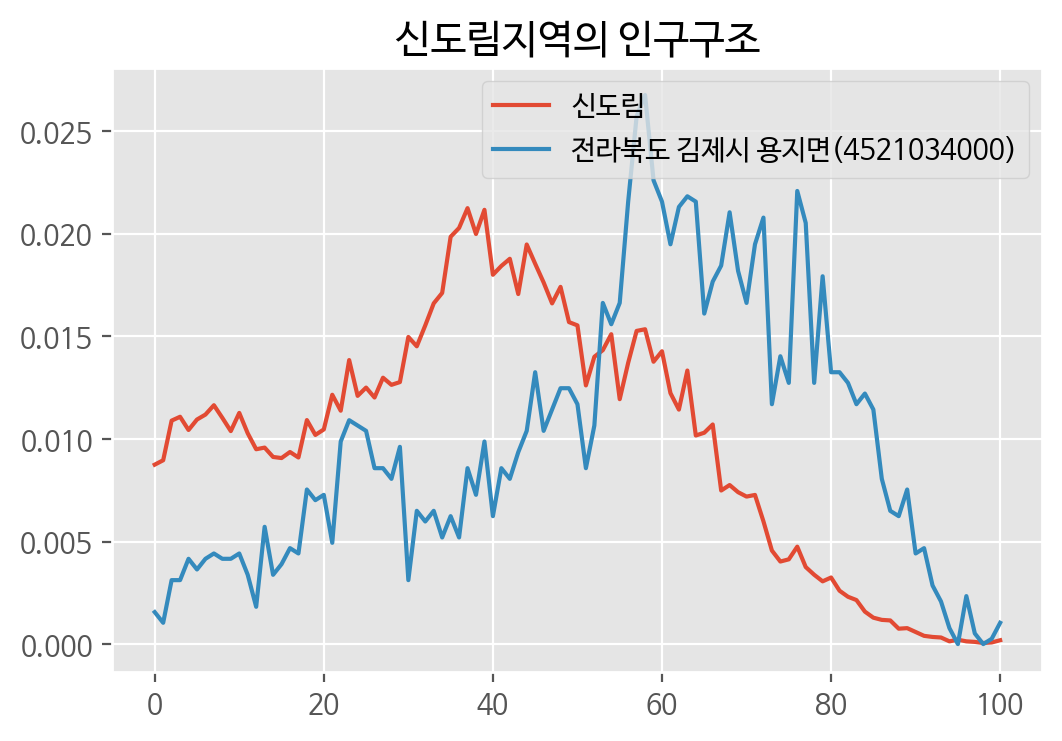

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f= open('age.csv',encoding='cp949')
data=csv.reader(f)
next(data)
data=list(data) # 데이터를 리스트에 추가

name=input('인구구조가 궁금한 지역명(읍면동 단위)을 입력하세요 : ')

min = 1 # 비율이기 때문에
result_name = '' #최소값을 갖는 지역의 이름으 저장할 변수 생성 및 초기화
result = 0 # 최소값을 갖는 지역의 연령대별 인구 비율 저장할 변수 생성 및 초기화

for row in data:
  if name in row[0]:
    home = np.array(row[3:], dtype=int) / int(row[2])

for row in data:
  away = np.array(row[3:], dtype=int) / int(row[2])
  s = np.sum(home-away)
  if s < min:
    min = s
    result_name = row[0]
    result = away # 인구 비율 저장

plt.style.use('ggplot')
plt.figure(dpi=200)
plt.rc('font',family='NanumBarunGothic')
plt.title(name+'지역의 인구구조')
plt.plot(home, label = name)
plt.plot(result, label = result_name)
plt.legend()
plt.show()

우리가 찾고 있었던 것은 인구 구조가 가장 비슷한 지역 -> 즉 연령대별 인구 비율과 분포가 비슷해야 함<br>
두 지역의 차이가 합한 값이 0에 가까울 수록 인구 구조가 비슷 -> 음수 값이 선택됨<br>
거듭제곱 연산자를 통해 음수를 양수로 변환 처리 추가

인구구조가 궁금한 지역명(읍면동 단위)을 입력하세요 : 신도림


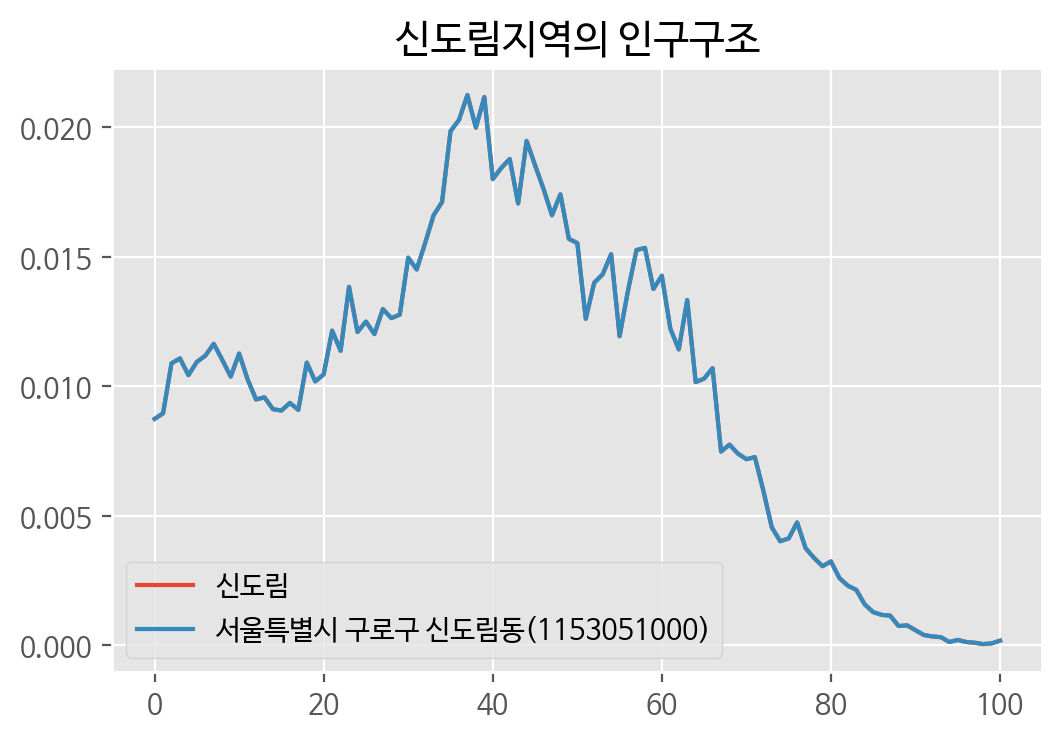

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f= open('age.csv',encoding='cp949')
data=csv.reader(f)
next(data)
data=list(data) # 데이터를 리스트에 추가

name=input('인구구조가 궁금한 지역명(읍면동 단위)을 입력하세요 : ')

min = 1 # 비율이기 때문에
result_name = '' #최소값을 갖는 지역의 이름으 저장할 변수 생성 및 초기화
result = 0 # 최소값을 갖는 지역의 연령대별 인구 비율 저장할 변수 생성 및 초기화

for row in data:
  if name in row[0]:
    home = np.array(row[3:], dtype=int) / int(row[2])

for row in data:
  away = np.array(row[3:], dtype=int) / int(row[2])
  s = np.sum((home-away)**2) # 음수 값을 양수로 변환
  if s < min:
    min = s
    result_name = row[0]
    result = away # 인구 비율 저장

plt.style.use('ggplot')
plt.figure(dpi=200)
plt.rc('font',family='NanumBarunGothic')
plt.title(name+'지역의 인구구조')
plt.plot(home, label = name)
plt.plot(result, label = result_name)
plt.legend()
plt.show()

# 완전 똑같은 것을 찾아냄(자기자신)
# 자기 자신은 제외하도록 코드 변경

인구구조가 궁금한 지역명(읍면동 단위)을 입력하세요 : 은행동


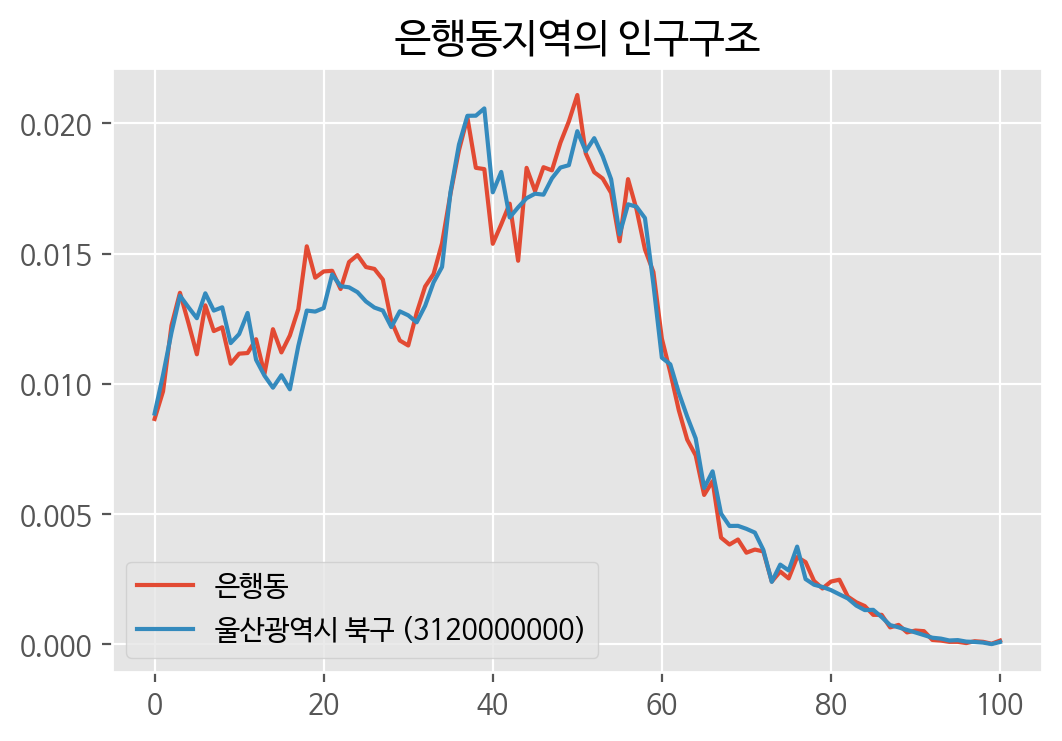

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f= open('age.csv',encoding='cp949')
data=csv.reader(f)
next(data)
data=list(data) # 데이터를 리스트에 추가

name=input('인구구조가 궁금한 지역명(읍면동 단위)을 입력하세요 : ')

min = 1 # 비율이기 때문에
result_name = '' #최소값을 갖는 지역의 이름으 저장할 변수 생성 및 초기화
result = 0 # 최소값을 갖는 지역의 연령대별 인구 비율 저장할 변수 생성 및 초기화

for row in data:
  if name in row[0]:
    home = np.array(row[3:], dtype=int) / int(row[2])

for row in data:
  away = np.array(row[3:], dtype=int) / int(row[2])
  s = np.sum((home-away)**2) # 음수 값을 양수로 변환
  if s < min and name not in row[0]:
    min = s
    result_name = row[0]
    result = away # 인구 비율 저장

plt.style.use('ggplot')
plt.figure(dpi=200)
plt.rc('font',family='NanumBarunGothic')
plt.title(name+'지역의 인구구조')
plt.plot(home, label = name)
plt.plot(result, label = result_name)
plt.legend()
plt.show()